In [1]:
import MDAnalysis as mda
import os
import matplotlib.pyplot as plt
import numpy as np

/home/julianne/miniconda3/envs/openff_clone/lib/python3.11/site-packages/Bio/__init__.py:138: BiopythonWarning: You may be importing Biopython from inside the source tree. This is bad practice and might lead to downstream issues. In particular, you might encounter ImportErrors due to missing compiled C extensions. We recommend that you try running your code from outside the source tree. If you are outside the source tree then you have a setup.py file in an unexpected directory: /home/julianne/miniconda3/envs/openff_clone/lib/python3.11/site-packages
  warnings.warn(


In [2]:
#u = mda.Universe('nvt.tpr', 'nvt1.trr', 'nvt2.trr')
os.getcwd()

'/media/julianne/DATA/Lipids/OpenFFLipid/NVTNPT/NVTNPT'

Look at 200 ns alternating

In [3]:
current_directory = os.getcwd()
new_directory = os.path.join(current_directory, '200psStep')

os.chdir(new_directory)
os.getcwd()

'/media/julianne/DATA/Lipids/OpenFFLipid/NVTNPT/NVTNPT/200psStep'

In [4]:

nvt_data = {}
npt_data = {}

#gmx energy -f NVT{}.edr -o NVT{}.xvg\ 13 0

# for i in {1..6}; do echo 13 0 | gmx energy -f nvt$i.edr -o nvt$i.xvg; done
# for i in {1..6}; do echo 13 0 | gmx energy -f npt$i.edr -o npt$i.xvg; done

for i in range(1, 7):
    nvt_data[f'nvt{i}'] = np.loadtxt(f'nvt{i}.xvg', comments=['#', '@'])
    npt_data[f'npt{i}'] = np.loadtxt(f'npt{i}.xvg', comments=['#', '@'])

# Adjusting the x-values for continuous time
for i in range(1, 7):
    npt_data[f'npt{i}'][:, 0] += nvt_data[f'nvt{i}'][-1, 0]
    
    # Ensure i+1 is within the valid range before adjusting
    if i < 6:
        nvt_data[f'nvt{i+1}'][:, 0] += npt_data[f'npt{i}'][-1, 0]

# Now the time data in your arrays should be continuous.

        
# Now you can access each dataset with nvt_data['nvt1'], nvt_data['nvt2'], etc.

In [5]:
nvt_data[f'nvt1'][-1, 0]

200.0

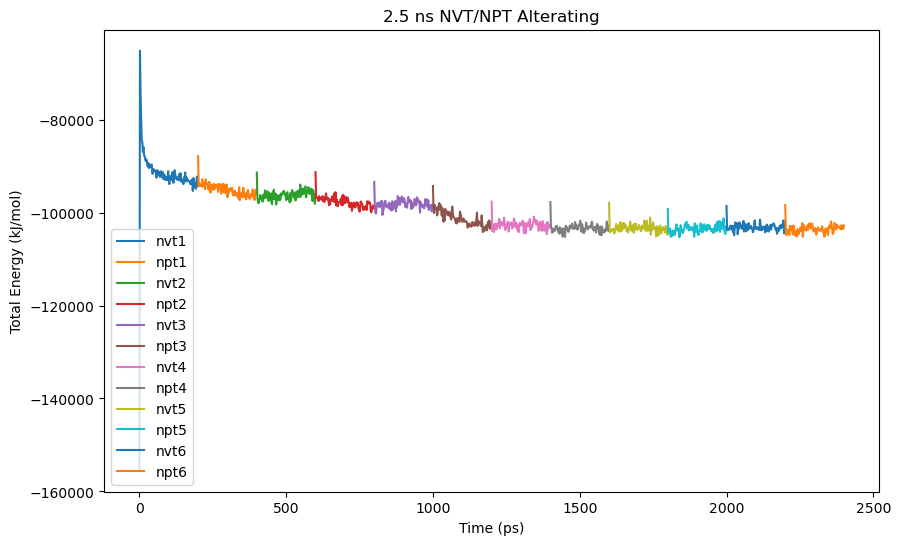

In [6]:
# Plotting all the data in one graph
plt.figure(figsize=(10, 6))

for i in range(1, 7):
    plt.plot(nvt_data[f'nvt{i}'][:, 0], nvt_data[f'nvt{i}'][:, 1], label=f'nvt{i}')
    plt.plot(npt_data[f'npt{i}'][:, 0], npt_data[f'npt{i}'][:, 1], label=f'npt{i}')

plt.xlabel('Time (ps)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('2.5 ns NVT/NPT Alterating')
plt.legend()
plt.show()

In [7]:
npt_data[f'npt6'][-1]

array([   2400.      , -102747.554688])

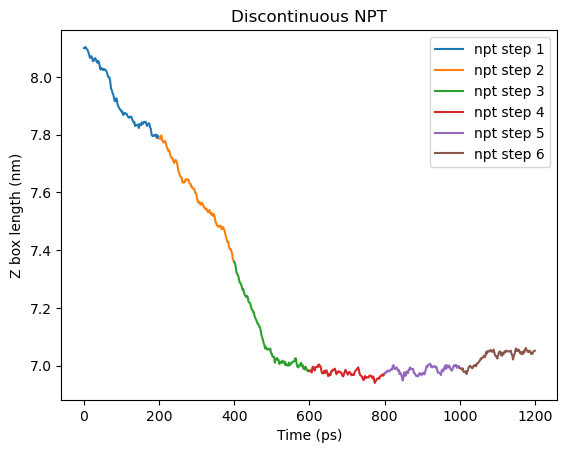

In [8]:
# for i in {1..6}; do echo 21 0 | gmx energy -f npt$i.edr -o npt_box$i.xvg; done


zbox_data = {}
for i in range(1, 7):
    zbox_data[f'npt_box{i}'] = np.loadtxt(f'npt_box{i}.xvg', comments=['#', '@'])

# Adjust the x-values for continuity
for i in range(2, 7):  # Start from the second dataset
    zbox_data[f'npt_box{i}'][:, 0] += zbox_data[f'npt_box{i-1}'][-1, 0]

for i in range(1, 7):
    plt.plot(zbox_data[f'npt_box{i}'][:, 0], zbox_data[f'npt_box{i}'][:, 1], label=f'npt step {i}')

plt.xlabel('Time (ps)')
plt.ylabel('Z box length (nm)')
plt.title('Discontinuous NPT')
plt.legend()
plt.show()

In [9]:
(np.average(zbox_data['npt_box6'][:,1]) + np.average(zbox_data['npt_box5'][:,1]))/2


7.007436717821783

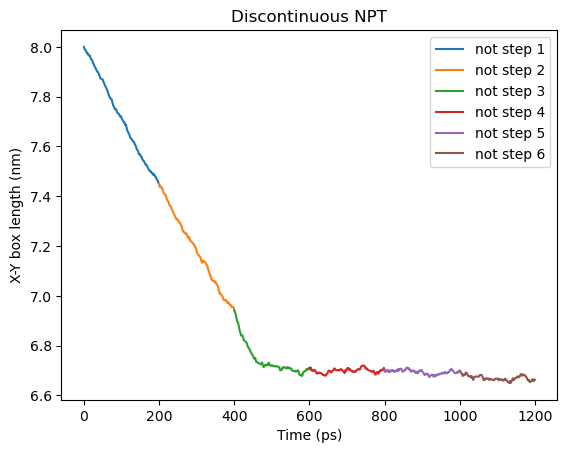

In [10]:
# for i in {1..6}; do echo 19 0 | gmx energy -f npt$i.edr -o xy_npt_box$i.xvg; done

xybox_data = {}
for i in range(1, 7):
    xybox_data[f'npt_box{i}'] = np.loadtxt(f'xy_npt_box{i}.xvg', comments=['#', '@'])

# Adjust the x-values for continuity
for i in range(2, 7):  # Start from the second dataset
    xybox_data[f'npt_box{i}'][:, 0] += xybox_data[f'npt_box{i-1}'][-1, 0]

for i in range(1, 7):
    plt.plot(xybox_data[f'npt_box{i}'][:, 0], xybox_data[f'npt_box{i}'][:, 1], label=f'not step {i}')
    
plt.xlabel('Time (ps)')
plt.ylabel('X-Y box length (nm)')
plt.title('Discontinuous NPT')
plt.legend()
plt.show()

Now lets do the 1 ps alternating

In [11]:
new_directory = os.path.join(current_directory,'1psStep')

os.chdir(new_directory)
os.getcwd()

'/media/julianne/DATA/Lipids/OpenFFLipid/NVTNPT/NVTNPT/1psStep'

In [12]:
nvt_data = {}
npt_data = {}

#gmx energy -f NVT{}.edr -o NVT{}.xvg\ 13 0

# for i in {1..6}; do echo 13 0 | gmx energy -f nvt_$i.edr -o nvt_$i.xvg; done
# for i in {1..6}; do echo 13 0 | gmx energy -f npt_$i.edr -o npt_$i.xvg; done

for i in range(1, 14):
    nvt_data[f'nvt_{i}'] = np.loadtxt(f'nvt_{i}.xvg', comments=['#', '@'])
    npt_data[f'npt_{i}'] = np.loadtxt(f'npt_{i}.xvg', comments=['#', '@'])

# Adjusting the x-values for continuous time
for i in range(1, 14):
    npt_data[f'npt_{i}'][:, 0] += nvt_data[f'nvt_{i}'][-1, 0]
    
    # Ensure i+1 is within the valid range before adjusting
    if i < 13:
        nvt_data[f'nvt_{i+1}'][:, 0] += npt_data[f'npt_{i}'][-1, 0]

# Now the time data in your arrays should be continuous.

        
# Now you can access each dataset with nvt_data['nvt1'], nvt_data['nvt2'], etc.


In [13]:
npt_data

{'npt_1': array([[ 1.00000000e+00, -5.84409844e+04],
        [ 2.00000000e+00, -6.51455859e+04]]),
 'npt_2': array([[ 3.00000000e+00, -6.12275469e+04],
        [ 4.00000000e+00, -6.88310938e+04]]),
 'npt_3': array([[ 5.00000000e+00, -6.39693438e+04],
        [ 6.00000000e+00, -7.02409688e+04]]),
 'npt_4': array([[ 7.00000000e+00, -6.50421406e+04],
        [ 8.00000000e+00, -7.33350234e+04]]),
 'npt_5': array([[ 9.00000000e+00, -6.87578828e+04],
        [ 1.00000000e+01, -7.62013750e+04]]),
 'npt_6': array([[ 1.10000000e+01, -7.17191484e+04],
        [ 1.20000000e+01, -7.73372578e+04]]),
 'npt_7': array([[ 1.30000000e+01, -7.38589609e+04],
        [ 1.40000000e+01, -8.04306562e+04]]),
 'npt_8': array([[ 1.50000000e+01, -7.33939609e+04],
        [ 1.60000000e+01, -8.11242500e+04]]),
 'npt_9': array([[ 1.70000000e+01, -7.55882656e+04],
        [ 1.80000000e+01, -8.14162500e+04]]),
 'npt_10': array([[ 1.90000000e+01, -7.64707812e+04],
        [ 2.00000000e+01, -8.20204219e+04]]),
 'npt_11'

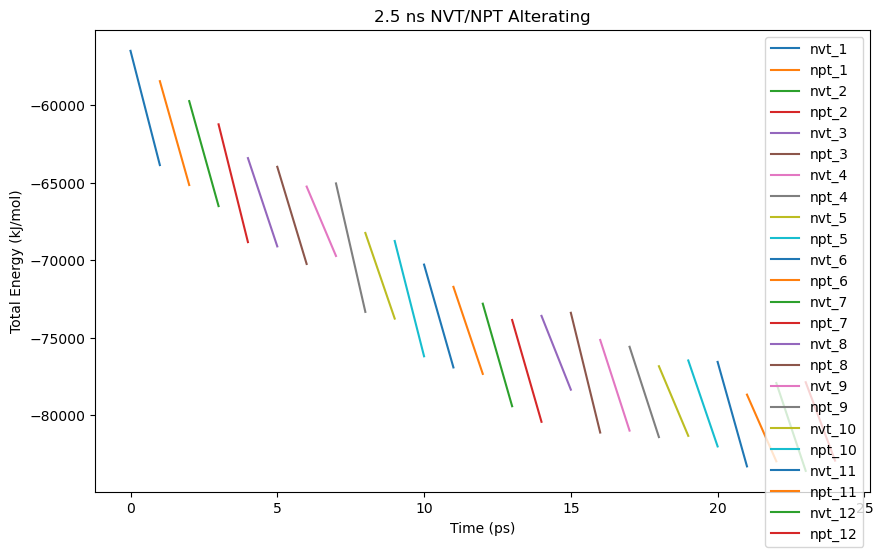

In [15]:
plt.figure(figsize=(10, 6))

for i in range(1, 13):
    plt.plot(nvt_data[f'nvt_{i}'][:, 0], nvt_data[f'nvt_{i}'][:, 1], label=f'nvt_{i}')
    plt.plot(npt_data[f'npt_{i}'][:, 0], npt_data[f'npt_{i}'][:, 1], label=f'npt_{i}')

plt.xlabel('Time (ps)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('2.5 ns NVT/NPT Alterating')
plt.legend()
plt.show()

In [9]:
import os

current_directory = os.getcwd()

In [10]:
new_directory = os.path.join(current_directory, '..', 'NotAlternating')

# Change the working directory to the new directory
os.chdir(new_directory)


In [11]:
nvt_data_full = np.loadtxt(f'nvt.xvg', comments=['#', '@'])
npt_data_full = np.loadtxt(f'npt.xvg', comments=['#', '@'])

npt_data_full[:, 0] += nvt_data_full[-1,0]

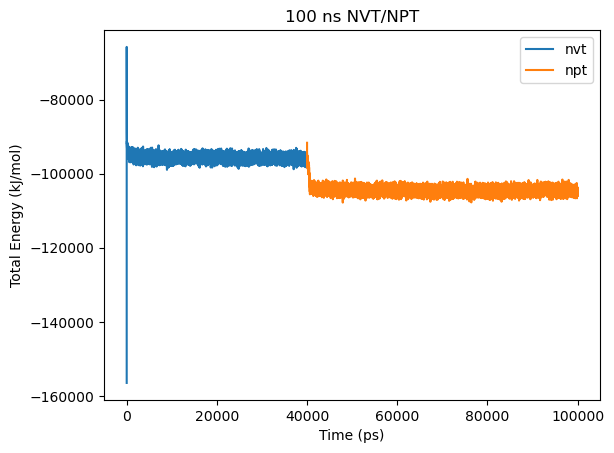

In [12]:
plt.plot(nvt_data_full[:, 0], nvt_data_full[:, 1], label=f'nvt')
plt.plot(npt_data_full[:, 0], npt_data_full[:, 1], label=f'npt')

plt.xlabel('Time (ps)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('100 ns NVT/NPT')
plt.legend()
plt.show()

In [23]:
print(npt_data_full.shape) 

(30001, 2)


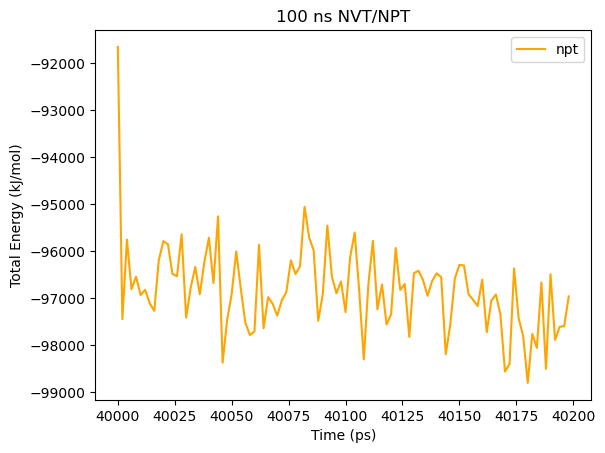

In [27]:
plt.plot(npt_data_full[:100, 0], npt_data_full[:100, 1], color='orange',label=f'npt')

plt.xlabel('Time (ps)')
plt.ylabel('Total Energy (kJ/mol)')
plt.title('100 ns NVT/NPT')
plt.legend()
plt.show()

In [23]:
npt_data_full[-1]

array([ 100000.      , -105243.765625])

In [24]:
x_y_pressure = np.loadtxt(f'x_y_pressure.xvg', comments=['#', '@'])
z_pressure = np.loadtxt(f'z_pressure.xvg', comments=['#', '@'])

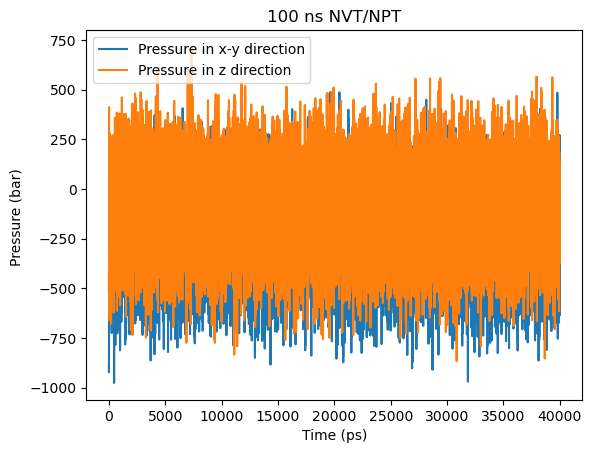

In [25]:
plt.plot(x_y_pressure[:, 0], x_y_pressure[:, 1], label=f'Pressure in x-y direction')
plt.plot(z_pressure[:, 0], z_pressure[:, 1], label=f'Pressure in z direction')

plt.xlabel('Time (ps)')
plt.ylabel('Pressure (bar) ')
plt.title('100 ns NVT/NPT')
plt.legend()
plt.show()

In [26]:
np.mean(z_pressure[:, 1])

-102.47171006909655

In [27]:
np.mean(x_y_pressure[:, 1])

-236.24092177741113

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


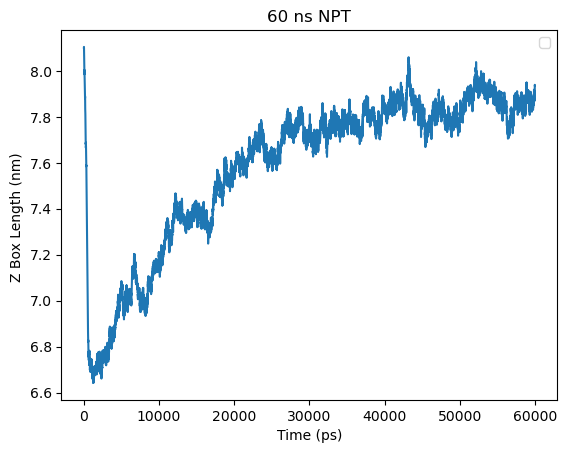

In [28]:
z_box = np.loadtxt(f'z-box.xvg', comments=['#', '@'])
plt.plot(z_box[:, 0], z_box[:, 1])


plt.xlabel('Time (ps)')
plt.ylabel('Z Box Length (nm) ')
plt.title('60 ns NPT')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


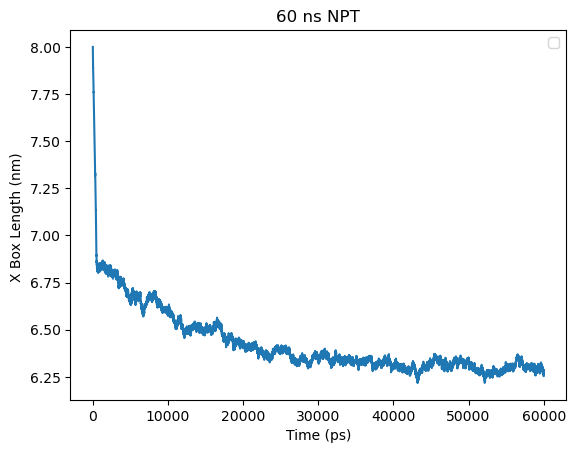

In [29]:
xy_box = np.loadtxt(f'xy-box.xvg', comments=['#', '@'])
plt.plot(xy_box[:, 0], xy_box[:, 1])


plt.xlabel('Time (ps)')
plt.ylabel('X Box Length (nm) ')
plt.title('60 ns NPT')
plt.legend()
plt.show()

In [53]:
z_box[30000:60000, 1]

array([7.936858])